In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("force2020_data.csv")

In [3]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [4]:
df.columns.duplicated().sum()

0

In [5]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [6]:
import matplotlib.pyplot as plt

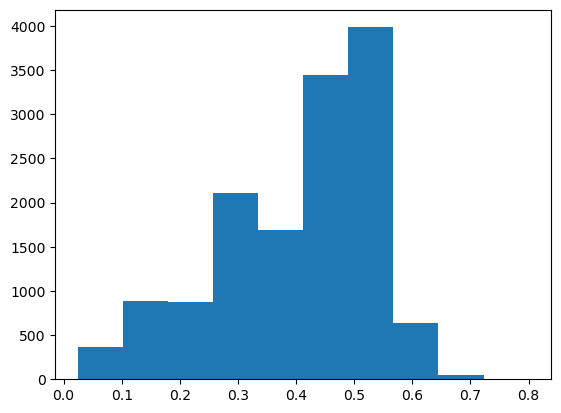

In [7]:
plt.hist(df['NPHI'])
plt.show()

In [13]:
df['NPHI'] = df['NPHI'].fillna(df['NPHI'].median())
df['NPHI']

0        0.448527
1        0.448527
2        0.448527
3        0.448527
4        0.448527
           ...   
18265    0.187811
18266    0.185574
18267    0.176074
18268    0.174617
18269    0.176627
Name: NPHI, Length: 18270, dtype: float64

In [14]:
df['NPHI'].isna().sum()

0

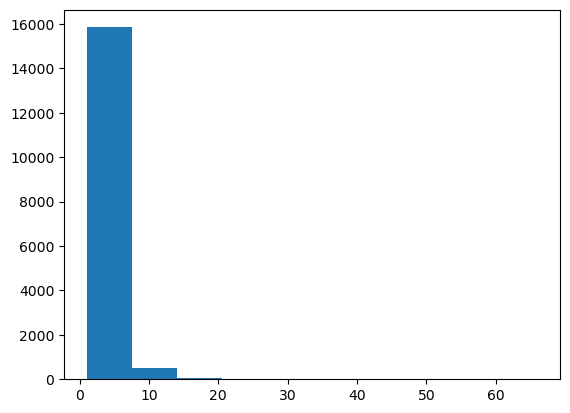

In [15]:
plt.hist(df['PEF'])
plt.show()

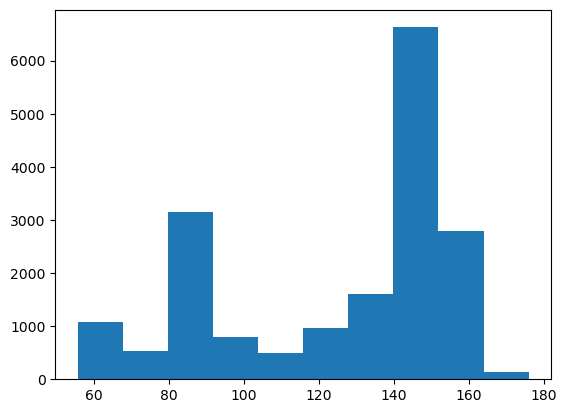

In [16]:
plt.hist(df['DTC'])
plt.show()

In [17]:
df = df.fillna(df.median())
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,0.448527,20.915468,161.131180
1,1.889794,79.262886,494.680,0.448527,19.383013,160.603470
2,1.896523,74.821999,494.832,0.448527,22.591518,160.173615
3,1.891913,72.878922,494.984,0.448527,32.191910,160.149429
4,1.880034,71.729141,495.136,0.448527,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,2.790249,141.300461
18266,2.643114,21.444370,3271.568,0.185574,2.790249,141.300461
18267,2.681300,22.646879,3271.720,0.176074,2.790249,141.300461
18268,2.738337,22.253584,3271.872,0.174617,2.790249,141.300461


In [19]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [20]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000
mean,2.110451,63.847477,1883.228478,0.414749,3.396380,125.177975
std,0.297725,28.636331,801.941195,0.118486,2.437978,30.569325
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.344193,2.355565,90.948286
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.491632,4.046910,148.012402
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


## Outliers 

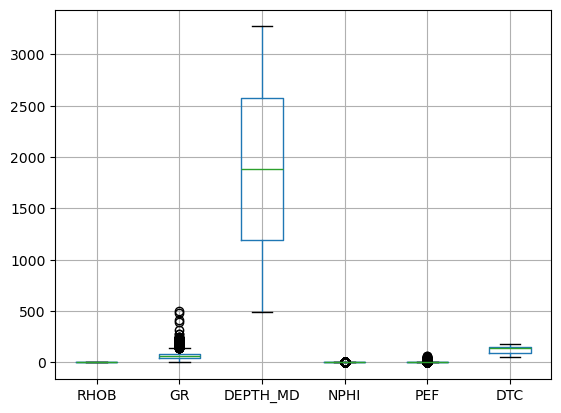

In [27]:
df.boxplot()
plt.show()

In [32]:
def remove_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+1.5*iqr
    lower_bound = q1-1.5*iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [34]:
for col in df:
    df[col] = remove_outliers(df,col)

<function matplotlib.pyplot.show(close=None, block=None)>

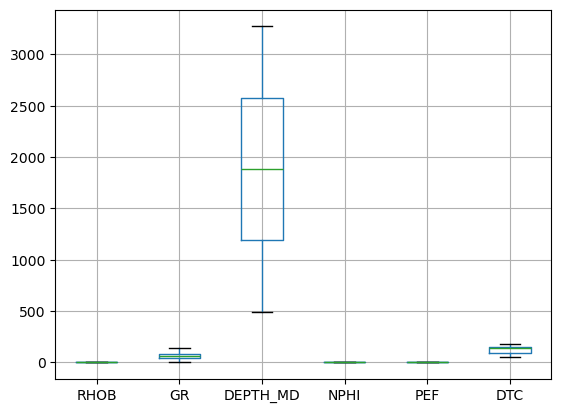

In [36]:
df.boxplot()
plt.show

## Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
min_scaler = MinMaxScaler()
df[['RHOB','GR','DEPTH_MD','NPHI','PEF','DTC']] = min_scaler.fit_transform(df[['RHOB','GR','DEPTH_MD','NPHI','PEF','DTC']])
df                                                

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,0.314847,0.561250,0.000000,0.551910,1.000000,0.876716
1,0.318528,0.554137,0.000055,0.551910,1.000000,0.872327
2,0.322946,0.520460,0.000109,0.551910,1.000000,0.868752
3,0.319919,0.505724,0.000164,0.551910,1.000000,0.868550
4,0.312121,0.497005,0.000219,0.551910,1.000000,0.868375
...,...,...,...,...,...,...
18265,0.804586,0.100310,0.999781,0.109837,0.319385,0.711771
18266,0.813056,0.115670,0.999836,0.106045,0.319385,0.711771
18267,0.838124,0.124789,0.999891,0.089936,0.319385,0.711771
18268,0.875567,0.121807,0.999945,0.087466,0.319385,0.711771


## K means Clustering

In [47]:
import numpy as np
import seaborn as sns

In [49]:
from sklearn.cluster import KMeans

In [61]:
X = df[['RHOB','DTC']]
X

,RHOB,DTC
0,0.314847,0.876716
1,0.318528,0.872327
2,0.322946,0.868752
3,0.319919,0.868550
4,0.312121,0.868375
...,...,...
18265,0.804586,0.711771
18266,0.813056,0.711771
18267,0.838124,0.711771
18268,0.875567,0.711771


In [63]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

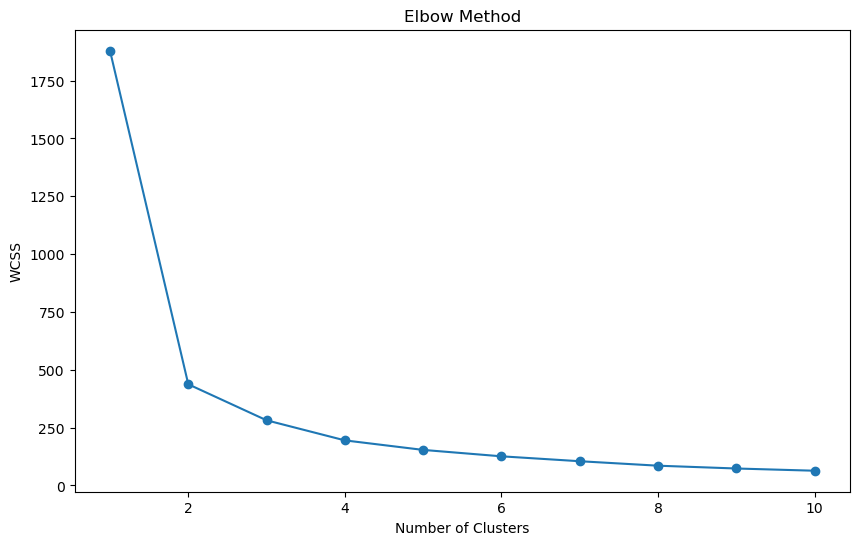

In [65]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [73]:
# Adding cluster labels to the dataset
df['Cluster'] = y_kmeans
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,0.314847,0.561250,0.000000,0.551910,1.000000,0.876716,1
1,0.318528,0.554137,0.000055,0.551910,1.000000,0.872327,1
2,0.322946,0.520460,0.000109,0.551910,1.000000,0.868752,1
3,0.319919,0.505724,0.000164,0.551910,1.000000,0.868550,1
4,0.312121,0.497005,0.000219,0.551910,1.000000,0.868375,1
...,...,...,...,...,...,...,...
18265,0.804586,0.100310,0.999781,0.109837,0.319385,0.711771,3
18266,0.813056,0.115670,0.999836,0.106045,0.319385,0.711771,3
18267,0.838124,0.124789,0.999891,0.089936,0.319385,0.711771,3
18268,0.875567,0.121807,0.999945,0.087466,0.319385,0.711771,3


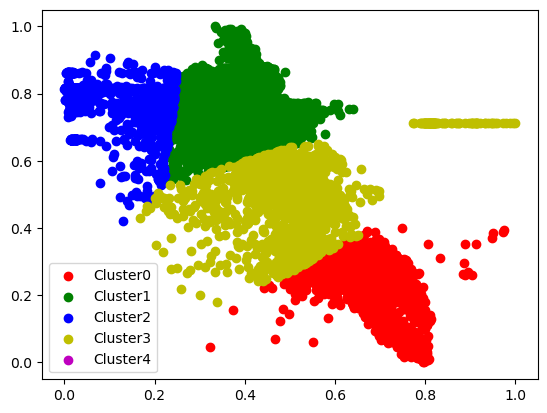

In [77]:
# assigning custom colors to clusters
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['RHOB'],
              cluster_data['DTC'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [79]:
# function to predict cluster for a new fish
def predict_cluster(RHOB,DTC):
  new_data = [[RHOB,DTC]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [81]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.578047327514929


In [90]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [91]:
# Adding cluster labels to the dataset
df['Cluster'] = y_kmeans
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,0.314847,0.561250,0.000000,0.551910,1.000000,0.876716,0
1,0.318528,0.554137,0.000055,0.551910,1.000000,0.872327,0
2,0.322946,0.520460,0.000109,0.551910,1.000000,0.868752,0
3,0.319919,0.505724,0.000164,0.551910,1.000000,0.868550,0
4,0.312121,0.497005,0.000219,0.551910,1.000000,0.868375,0
...,...,...,...,...,...,...,...
18265,0.804586,0.100310,0.999781,0.109837,0.319385,0.711771,0
18266,0.813056,0.115670,0.999836,0.106045,0.319385,0.711771,0
18267,0.838124,0.124789,0.999891,0.089936,0.319385,0.711771,0
18268,0.875567,0.121807,0.999945,0.087466,0.319385,0.711771,1


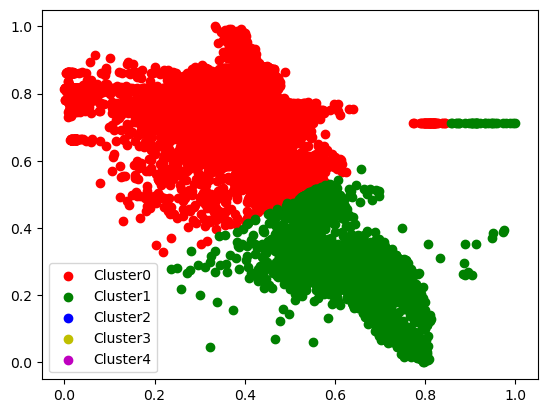

In [92]:
# assigning custom colors to clusters
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['RHOB'],
              cluster_data['DTC'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [93]:
# function to predict cluster for a new fish
def predict_cluster(RHOB,DTC):
  new_data = [[RHOB,DTC]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [94]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6921393949422586
